# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 6. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [183]:
# Bot check

# HW_ID: fpmi_ad6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import gen_batches
from sklearn import metrics

In [186]:
plt.rcParams["figure.figsize"] = (15,15)
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.


**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

<u>Теорема</u>
Если $\mathbf{X}^\intercal\mathbf{X}$ - невырождена, то решение задачи МНК (метода наименьших квадратов) является:
$$ \widehat{\theta} = (\mathbf{X}^\intercal\mathbf{X})^{-1} \mathbf{X}^\intercal\mathbf{Y} $$

Здесь в качестве $\mathbf{X}$ - матрица $n\times m$, где строки($n$) - $i$-ые данные, а столбцы($m$) - различные параметры измерения. В данном случае $n\times m = n \times 1$. Тогда $\mathbf{X} = \mathbf{x}$ - вектор, а $(\mathbf{x}^\intercal\mathbf{x}) = \sum\limits^{n}_{1} {x_i}^2$ - квадрат его нормы. В данном случае$\mathbf{Y}$ - вектор, а значит $\mathbf{X}^\intercal\mathbf{Y} = \sum\limits^{n}_{1} x_iy_i$ как скалярное произведение. Тогда собираем ответ:
$$ \widehat{\theta} =  \frac{\sum\limits^{n}_{1} x_iy_i}{\sum\limits^{n}_{1} {x_i}^2}$$


**2.** Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).

Решаем задачу:
$$ F(\theta) = \|{\mathbf{y} - \mathbf{x} \theta} \| \longrightarrow \limits _{\theta \in \mathbb{R}} min$$

<u>Методом GD</u>
Тогда шаг GD:
$$ \theta_{t+1} = \theta_{t} - \eta \mathbf{X}^\intercal (\mathbf{X}\theta_{t} - \mathbf{Y}) = \theta_{t} - \eta \sum\limits_{1}^{n}x_i (x_i^\intercal \theta_{t} - y_i) = \theta_{t} - \eta \sum\limits_{1}^{n}x_i (x_i \theta_{t} - y_i)$$. Где $\eta$ - шаг спуска. Также последнее равенство выполнено в условиях нашей задачи, где $x_i = x_i^\intercal$, поскольку $x \in \mathbb{R}$.


<u>Методом SGD</u>
Идея: Вычисление матрицы $\mathbf{X}^\intercal (\mathbf{X}\theta_{t} - \mathbf{Y})$ для ее размера $n$ - ресурсозатратно, поэтому предлагается делать шаг для $\theta$ по результатам только некоторой части данных. При этом батчи будут меняться, для того, чтобы использовать все данные для обучения.
Для этого определяются батчи (batch) на которых будут происходить шаги спуска. Например, батчи размера $k$ можно определить так $B_i = \{x_j| j \in [kj : k(j+1))\}$. Важно следить, за тем, чтобы эти данные были случайные, те не было явной зависимости между данными в одном батче. Для этог можно перемешать изначальную выборку, или собирать батчи подругому - выбирая случайные элементы выборки в батчи.
Стоит отметить, что последний собранный батч может иметь размер меньше, чем $k$, а значит нужно будет делать поправку на это в спуске.

Тогда шаг в нашей задаче SGD:
$$ \theta_{t+1} = \theta_{t} - \eta \frac{n}{k} \sum\limits_{1}^{k}x_i (x_i \theta_{t} - y_i)$$ Где $\eta$ - шаг спуска, а $k$ -  размер текущего батча.


**3.** Пусть $\mathsf{E}\varepsilon_i = 0$, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{E}\widehat{\theta}$ и $\mathsf{E}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.

Воспользуемся формулой из задачи 1 и тем фактом, что $x_i$, а значит и $\theta$ неслучайные величины:
$$ \mathsf{E}\widehat{\theta} =  \mathsf{E}\frac{\sum\limits^{n}_{1} x_iy_i}{\sum\limits^{n}_{1} {x_i}^2} = \frac{\sum\limits^{n}_{1} \mathsf{E} x_i (\theta x_i + \varepsilon_i))}{\sum\limits^{n}_{1} {x_i}^2} = \frac{\sum\limits^{n}_{1} x_i (\theta x_i + \mathsf{E}\varepsilon_i))}{\sum\limits^{n}_{1} {x_i}^2} = \frac{\sum\limits^{n}_{1} x_i (\theta x_i))}{\sum\limits^{n}_{1} {x_i}^2} = \theta$$
А значит:
$$\mathsf{E}\widehat{y}(x) = \mathsf{E} \widehat{\theta} x = \theta x $$


**4.** Пусть $\mathsf{E}\varepsilon_i = 0$ и $\mathsf{D}\varepsilon_i = \sigma^2$, причем все $\varepsilon_i$ независимы, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{D}\widehat{\theta}$ и $\mathsf{D}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.

Воспользуемся формулой из задачи 1 и тем фактом, что $x_i$, а значит и $\theta$ неслучайные величины, а также свойствами дисперсии:
$$ \mathsf{D}\widehat{\theta} =  \mathsf{D}\frac{\sum\limits^{n}_{1} x_iy_i}{\sum\limits^{n}_{1} {x_i}^2} = \frac{\sum\limits^{n}_{1} \mathsf{D} x_i (\theta x_i + \varepsilon_i)}{(\sum\limits^{n}_{1} {x_i}^2)^2} = \frac{\sum\limits^{n}_{1} \mathsf{D} x_i \varepsilon_i}{(\sum\limits^{n}_{1} {x_i}^2)^2} = \frac{\sum\limits^{n}_{1}   x_i^2 \mathsf{D}\varepsilon_i}{(\sum\limits^{n}_{1} {x_i}^2)^2} = \frac{\sum\limits^{n}_{1}   x_i^2 \sigma^2}{(\sum\limits^{n}_{1} {x_i}^2)^2} = \frac{\sigma^2}{\sum\limits^{n}_{1} {x_i}^2}$$
Тогда:
$$ \mathsf{D}\widehat{y}(x) = \frac{\sigma^2}{\sum\limits^{n}_{1} {x_i}^2} x $$


**5.** При каких условиях дисперсии в пункте 4 конечны? Подумайте и ответьте на вопрос, как ведет себя дисперсия предсказания в многомерном случае если матрица $X^T X$ близка к вырожденной.

Причина по которой дисперсии могут быть близки к бесконечности - около нулевой знаменатель. Такое может случиться, если каждое из значений $x$ близко к 0. В многомерном случае это условие эквивалентно тому, что матрица $X^T X$ близка к вырожденной. Так как она состоит из попарных скалярных произведений векторов данных. Это означает, что при вырожденности матрицы $X^T X$, дисперсия предсказаний линейной регрессии может быть сколь угодно, большой, а значит нельзя говорить о точности предсказания.


*Замечания.*
1. В пунктах 3-5 речь идет о $\widehat{\theta}$, которая является *решением* задачи метода наименьших квадратов. Поэтому пользуйтесь явной формулой этого решения, а не формулами методов вычисления решения.
2. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
3. **Прочитай требования к формату решения в правилах сдачи задания.**

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

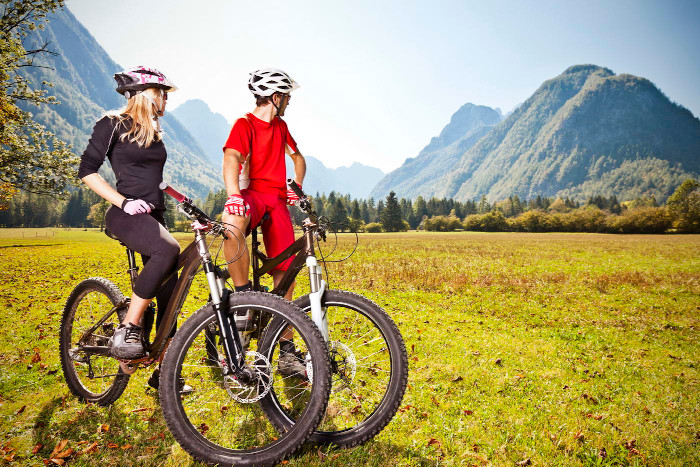

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [187]:
# Features to take from all features
acceptable_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Read df
df_day = pd.read_csv('../Data/Bike-Sharing-Dataset/day.csv')
df_day = df_day[acceptable_features]

# Split into train and test - 4:1
df_train, df_test = train_test_split(df_day, test_size=0.2, random_state=42, shuffle=True)

# Target and parameter features
target = ['cnt']
features = list(set(acceptable_features) - set(target))

# Check for correct size
print('Size of train: {}, test: {}'.format(df_train.shape[0], df_test.shape[0]))
df_day.head(5)

Size of train: 584, test: 147


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

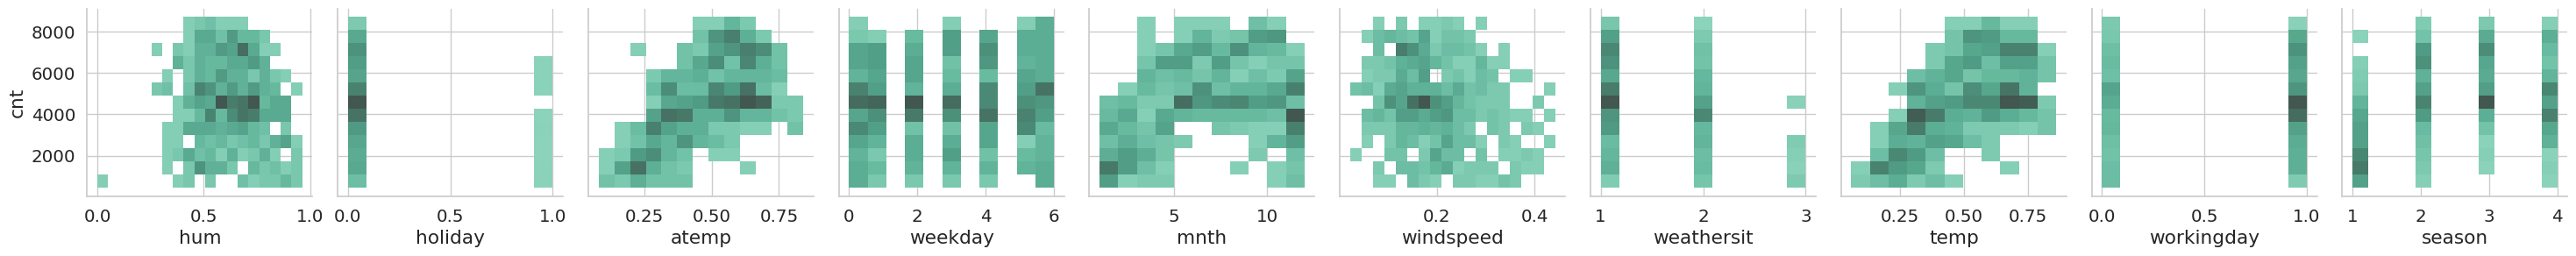

In [188]:
# Plot graphs to investigate dependencies visually
sns.color_palette("icefire", as_cmap=True)
sns.pairplot(df_train, y_vars=target, x_vars=features,  kind='hist', height=3)
plt.savefig('../Pictures/cnt-features.png')

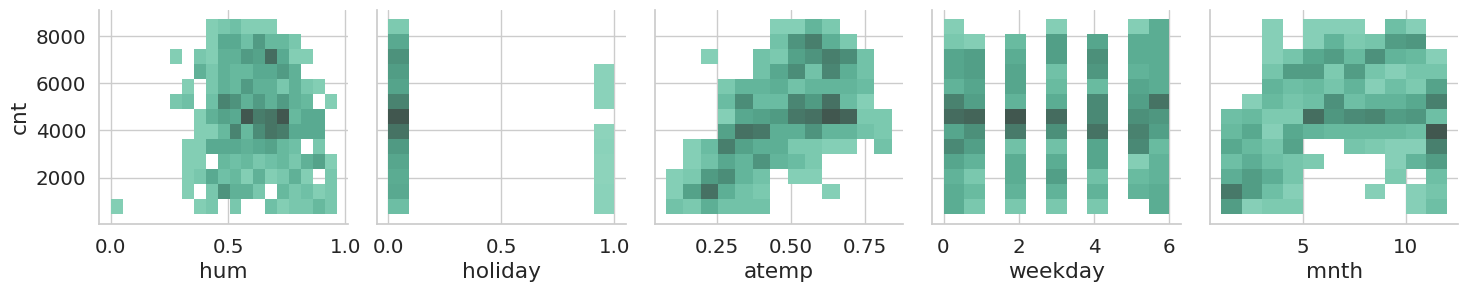

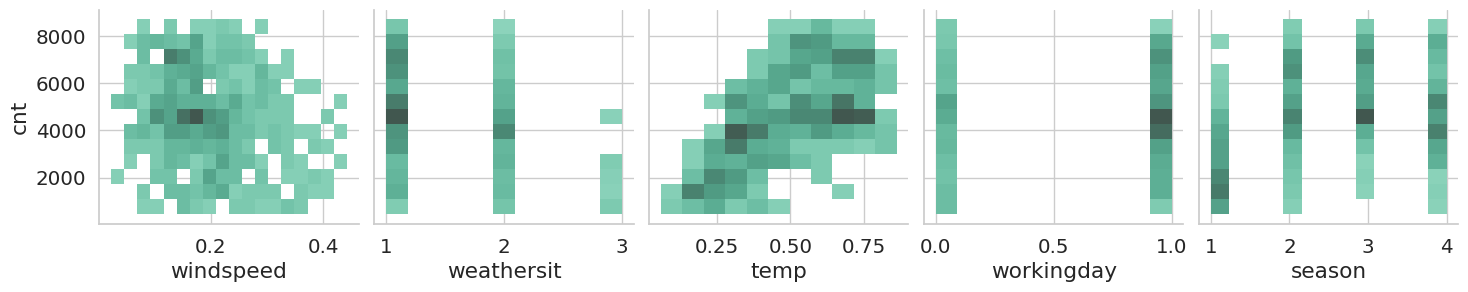

In [189]:
# Better visual
size_of_features = len(features) // 2
sns.pairplot(df_train, y_vars=target, x_vars=features[:size_of_features],  kind='hist', height=3)
sns.pairplot(df_train, y_vars=target, x_vars=features[size_of_features:],  kind='hist', height=3)

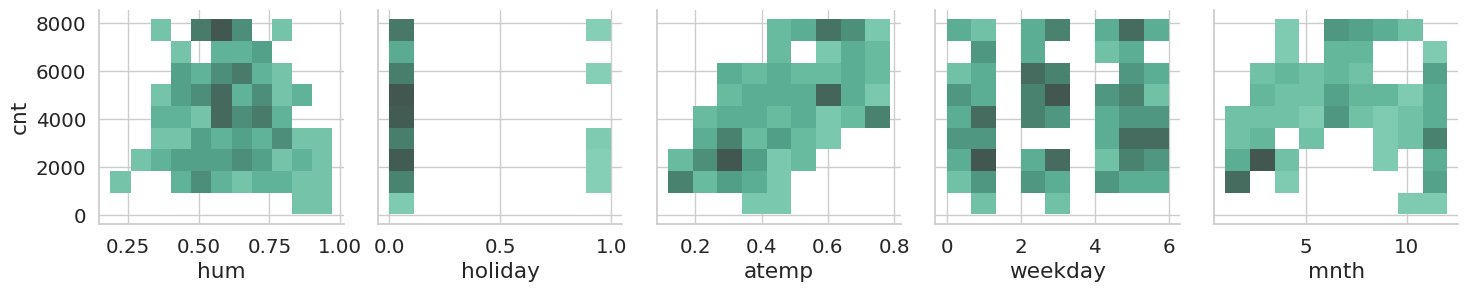

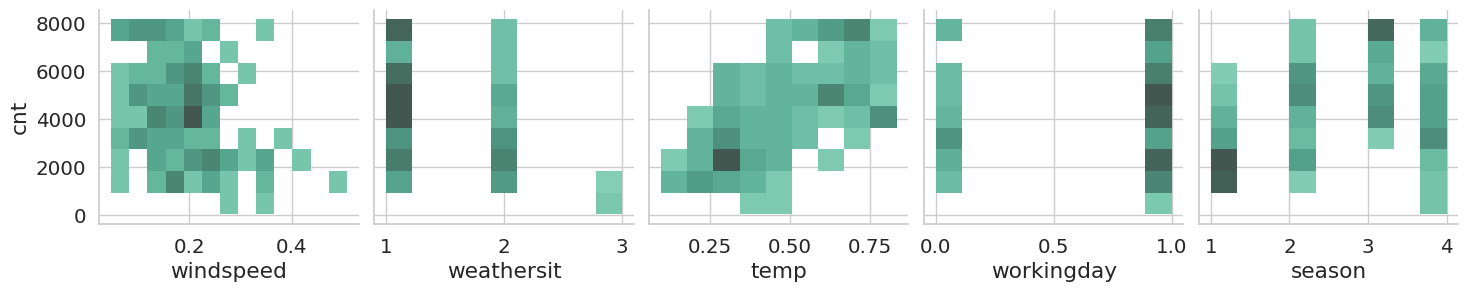

In [190]:
# For test
size_of_features = len(features) // 2
sns.pairplot(df_test, y_vars=target, x_vars=features[:size_of_features],  kind='hist', height=3)
sns.pairplot(df_test, y_vars=target, x_vars=features[size_of_features:],  kind='hist', height=3)

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:**
1) Что касается выбросов. Немного выбросов есть, но сами они незначительны и их число тоже незначительно по сравнению с основной выборкой.
Только если тот день, когда была около нулевой влажность. Его можно выкинуть, тк он точно не соответствует действительности.
2) На графиках temp, atemp - можно наблюдать явно линейную зависимость искомого числа прокатов от значения температуры. Более того имеет смысл оставить только одну из них.
3) На графике weathersit наблюдается линейное падение проката с ухудшением погоды, хотя возможно его стоит сделать категориальным.
4) Для mnth характерна сезонная зависимость с наиболее популярными месяцами - летними, что также отражает сезонный график для описания этого явления, возможно имеет использовать $x^2$, где $x$ - это номера месяца.
5) Для holiday очень мало случаев проката в праздничные дни.
6) Для  влажности (hum) возможно следует применить $I\{x > 0.25\}$.


Забавно, что очень мало и данных и людей катаются в праздники, казалось бы это контр интуитивно, но возможно эта компания редко работает в праздники, это ведь праздники)

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще.

**Процедура предобработки данных:**

**a).** Выкинем выбросы.
**b).** Зададим новые признаки: квадрат номера месяца
**c).** Нужно перевести сезоны как категориальные признаки OneHotEncoder-ом.
Я считаю что порядковая зависимость месяцев может иметь значение, так же как и weathersit. А вот сезоны можно преобразовать. Holiday по факту уже преобразованы

Реализуйте данную процедуру.

In [191]:
# a) Remove dropouts
df_train = df_train[df_train['hum'] > 0.2]

In [192]:
# b) add new features
df_train['mnth_sq'] = df_train['mnth'] * df_train['mnth']
df_train['hum_ind'] = np.array([df_train['hum'] > 0.25])[0].astype(int)
# df_train.head(5)

/tmp/ipykernel_10921/3340048664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['mnth_sq'] = df_train['mnth'] * df_train['mnth']
/tmp/ipykernel_10921/3340048664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['hum_ind'] = np.array([df_train['hum'] > 0.25])[0].astype(int)


In [193]:
# Categoral and real features
categorial_features = ['season', 'holiday', 'workingday', 'weathersit']
drop_fetures = ['atemp']
real_feature = list(set(features) - set(categorial_features) - set(target) - set(drop_fetures))

# c) Encode categoral fetaures
encoder = OneHotEncoder(drop='first', sparse_output=False)
x_cat_train =  encoder.fit_transform(df_train[categorial_features])

# Combine all features
X_train = np.hstack([df_train[real_feature], x_cat_train])
X_train

array([[ 0.662917,  2.      , 11.      , ...,  1.      ,  1.      ,
         0.      ],
       [ 0.939565,  4.      ,  9.      , ...,  1.      ,  0.      ,
         1.      ],
       [ 0.612917,  6.      , 12.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.84875 ,  3.      ,  9.      , ...,  1.      ,  1.      ,
         0.      ],
       [ 0.476957,  0.      ,  3.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.819167,  3.      ,  4.      , ...,  1.      ,  1.      ,
         0.      ]])

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [194]:
# Fit model
model = LinearRegression(fit_intercept=True)
model.fit(X_train, df_train[target]);

In [195]:
# Look at coefs
print(model.coef_, model.intercept_)

[[-2.71258552e+03  6.20816589e+01  1.05721745e+00 -2.87890119e+03
   6.53874616e+03  8.05149696e+02  2.01431393e+02  1.45922569e+03
  -4.84596685e+02  9.71944535e+01 -2.21578115e+02 -1.61052878e+03]] [2824.16567415]


Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

In [196]:
# Add new features for test
df_test['mnth_sq'] = df_test['mnth'] * df_test['mnth']
df_test['hum_ind'] = np.array([df_test['hum'] > 0.25])[0].astype(int)
# df_train.head(5)

In [197]:
# Encode categoral features (without fitting!)
x_cat_test =  encoder.transform(df_test[categorial_features])
X_test = np.hstack([df_test[real_feature], x_cat_test])
X_test

array([[ 0.73375 ,  2.      , 12.      , ...,  1.      ,  0.      ,
         0.      ],
       [ 0.437826,  4.      ,  2.      , ...,  1.      ,  0.      ,
         0.      ],
       [ 0.585833,  5.      , 10.      , ...,  1.      ,  1.      ,
         0.      ],
       ...,
       [ 0.64375 ,  5.      , 11.      , ...,  1.      ,  0.      ,
         0.      ],
       [ 0.471667,  3.      ,  6.      , ...,  1.      ,  0.      ,
         0.      ],
       [ 0.787917,  1.      ,  5.      , ...,  1.      ,  0.      ,
         0.      ]])

In [198]:
# Define MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

In [199]:
# Test
# Predictions
test_preds = model.predict(X_test)

# Metrics
RMSE = metrics.mean_squared_error(df_test[target], test_preds) ** 0.5
MAE = metrics.mean_absolute_error(df_test[target], test_preds)
MAPE = float(mean_absolute_percentage_error(df_test[target], test_preds))
print('On Test: RMSE: {}, MAE: {}, MAPE: {}'.format(RMSE, MAE, MAPE))

On Test: RMSE: 1331.3050310271137, MAE: 1155.9933333948334, MAPE: 104.96271546686333


In [200]:
# Train
# Predictions
train_preds = model.predict(X_train)

# Metrics
RMSE = metrics.mean_squared_error(df_train[target], train_preds) ** 0.5
MAE = metrics.mean_absolute_error(df_train[target], train_preds)
MAPE = float(mean_absolute_percentage_error(df_train[target], train_preds))
print('On Train: RMSE: {}, MAE: {}, MAPE: {}'.format(RMSE, MAE, MAPE))

On Train: RMSE: 1266.2415226263245, MAE: 1084.0983740678173, MAPE: 30.693599558376615


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

Проблема могла бы возникнуть в том, что детерминант матрицы, которую нужно обратить близок к 0. Но этого не случилось. Потому, что я заранее избавился от atemp, поскольку он почти дублировал temp.

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [201]:
# Bruteforce method calculations

# Add ones
X_brute_force_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])

# First part preinverted matrix
coefs_1 = np.dot(X_brute_force_train.T, X_brute_force_train)

# Check if det == 0 and invert
print(np.linalg.det(coefs_1))
coefs_1 = np.linalg.inv(coefs_1)

# Second part
coefs_2 = np.dot(X_brute_force_train.T, df_train[target])

# Combine
coefs = np.dot(coefs_1, coefs_2)

7.465658861563257e+23


In [202]:
# Test

# Add ones
X_brute_force_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

# Predict
test_brute_force_pred = np.dot(X_brute_force_test, coefs)

# Metrics
RMSE = metrics.mean_squared_error(df_test[target], test_brute_force_pred) ** 0.5
MAE = metrics.mean_absolute_error(df_test[target], test_brute_force_pred)
MAPE = float(mean_absolute_percentage_error(df_test[target], test_brute_force_pred))
print('On Test: RMSE: {}, MAE: {}, MAPE: {}'.format(RMSE, MAE, MAPE))

On Test: RMSE: 1331.305031027121, MAE: 1155.993333394841, MAPE: 104.96271546686626


In [203]:
# Train

# Predict
train_brute_force_pred = np.dot(X_brute_force_train, coefs)

# Metrics
RMSE = metrics.mean_squared_error(df_train[target], train_brute_force_pred) ** 0.5
MAE = metrics.mean_absolute_error(df_train[target], train_brute_force_pred)
MAPE = float(mean_absolute_percentage_error(df_train[target], train_brute_force_pred))
print('On Train: RMSE: {}, MAE: {}, MAPE: {}'.format(RMSE, MAE, MAPE))

On Train: RMSE: 1266.2415226263247, MAE: 1084.098374067819, MAPE: 30.693599558376995


Сделайте выводы.

**Выводы:**

Была построена модель линейной регрессии, которая позволяет предсказывать спрос на прокат велосипедов в зависимости от дня и погоды. Модель показала следующее качество:
На Тренировочной: RMSE: 1266, MAE: 1084, MAPE: 30.6
На Тестовой: On Test: RMSE: 1331, MAE: 1156, MAPE: 104.9
Можно заметить, что значения первых двух метрик не сильно отличается у обеих выборок, что может говорить о хорошем качестве модели. Хотя Большая разница в Процентном абсолютном отклонении заставляет задуматься о том, что в тестовой выборке присутствует небольшое число сильно отличающихся точек. Это подтверждает построенный Ниже график. Из него видно, что 5 из 147 точек (~3%) отклоняется от реальной величины более чем на 1.5 значения этой величины. Возможно (скорее всего) это выбросы, возможно это какая-то неучтенная зависимость.

Text(0, 0.5, 'Число точек вне этого диапозона')

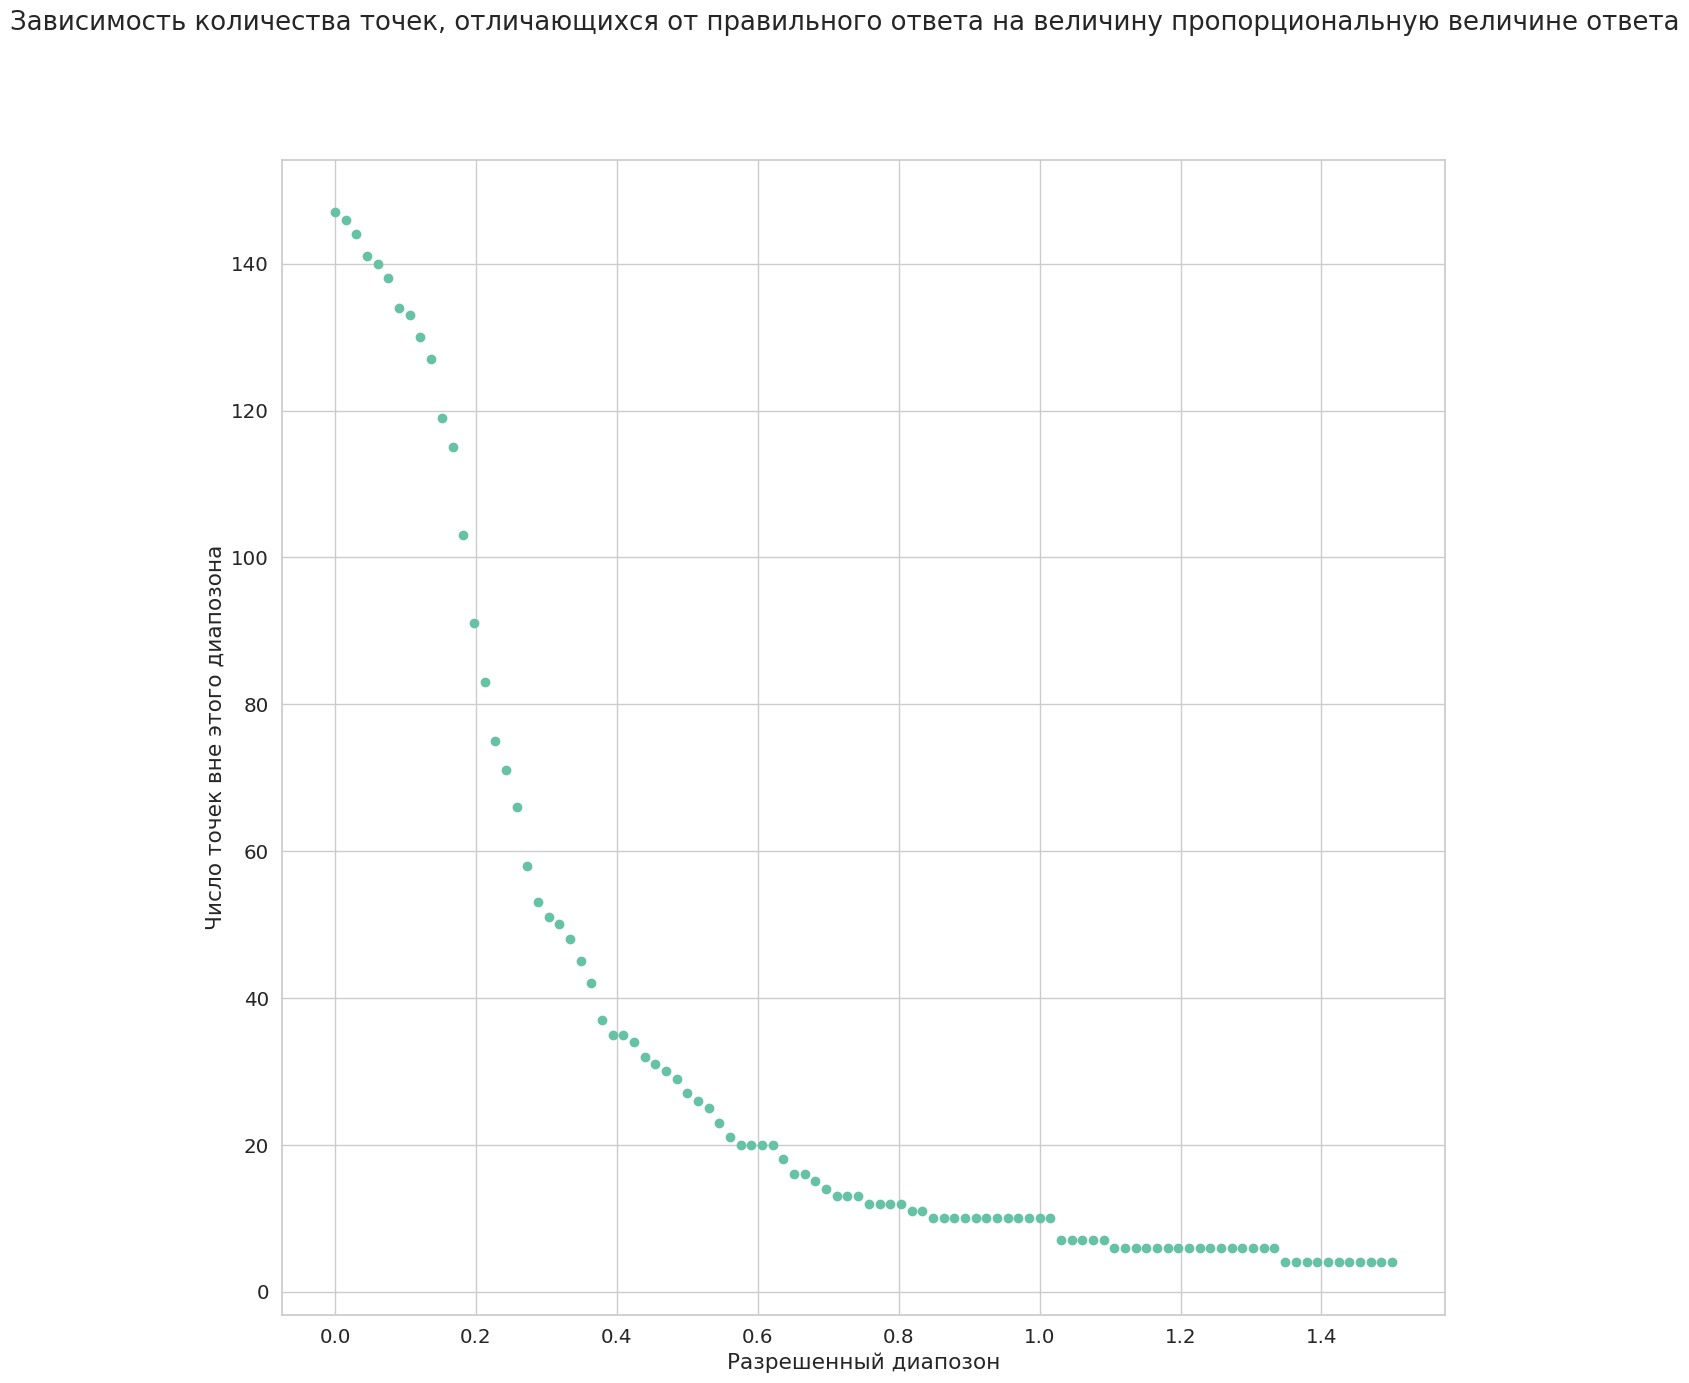

In [204]:
# Difference between pred and true
diff = np.abs(df_test[target] - test_brute_force_pred)

# Function to calc amount of points out of range
funk = lambda x: test_brute_force_pred[diff > df_test[target] * x].shape[0]
funk_vec = np.vectorize(funk)

# Plot
x = np.linspace(0, 1.5, 100)
y = funk_vec(x)
plt.scatter(x, y)
plt.suptitle("Зависимость количества точек, отличающихся от правильного ответа на величину пропорциональную величине ответа")
plt.xlabel('Разрешенный диапозон')
plt.ylabel('Число точек вне этого диапозона')

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

Рассмотрим функция оптимизации:
$$F(\theta) = \| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$

Расскроем скобочки и нормы:
$$F(\theta) = Y^\intercal Y - 2 Y^\intercal X \theta + \theta ^ \intercal X^\intercal X \theta + \lambda \theta ^ \intercal \theta$$

Возьмем градиент и приравняем 0, как критерий минимума:
$$\nabla_{\theta} F(\theta) = -2X ^ \intercal Y + 2X^\intercal X \theta + 2 \lambda \theta = 0$$

Выразим $\theta$:
$$ \theta = \frac{X ^ \intercal Y}{X^\intercal X + \lambda}$$

Что дает отличается от обычной линейной регрессии слагаемым $\lambda$ в знаменателе. Это помогает решить проблему около вырожденной матрицы $X^\intercal X$, поскольку мы не получаем нуль в знаменателе.

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

Для этого нам потребуется градиент:
$$\nabla_{\theta} F(\theta) = -2X ^ \intercal Y + 2X^\intercal X \theta + 2 \lambda \theta = 2 X^\intercal (X\theta_{t} - Y) + 2 \lambda \theta $$

Тогда шаг против градиента в GD:
$$ \theta_{t+1} = \theta_{t} - \eta X^\intercal (X\theta_{t} + \lambda - Y) = \theta_{t} - \eta \sum\limits_{1}^{n}x_i (x_i^\intercal \theta_{t} - y_i) + \lambda \theta_t $$ Где $\eta$ - шаг спуска.

Тогда шаг против градиента в SGD:
$$ \theta_{t+1} = \theta_{t} - \eta \frac{n}{k} \sum\limits_{1}^{k}x_i (x_i^\intercal \theta_{t} - y_i) + \lambda \theta_t $$ Где $\eta$ - шаг спуска, а $k$ -  размер текущего батча.
Причем батчи определяются также, как и в обычной регрессии.

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.


В случае rigid-regression, в отличае от обычной регрессии, есть $\lambda$, которая задает "масштаб" для всех параметров одновременно. Например, если один из параметров явно большой, то относительно него $\lambda$ моет быть маленькой и регрессия превратиться из rigid в обычную. А если же наоборот, то константа $\lambda$ может нивилировать любые различия в данных, которые много меньше, чем $\lambda$.

### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2.

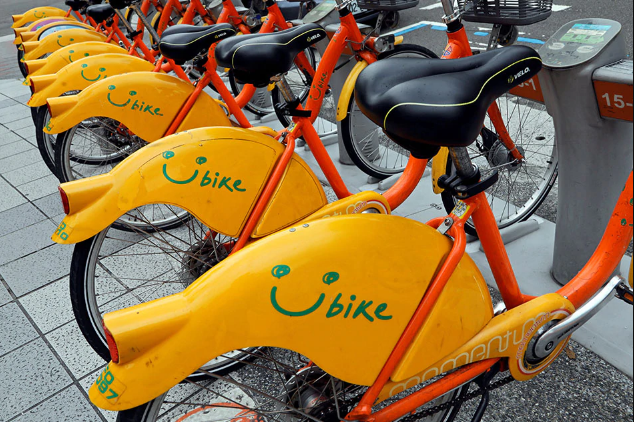

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [205]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.
        
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''

        self.coefs_ = None
        self.scaler = StandardScaler()
        self.lambd = lambd
        self.fit_intercept = fit_intercept


    def fit(self, X, Y):
        '''
        Обучение модели ridge-регрессии.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        
        # Посчитайте оценки коэффициентов и, возможно, 
        # еще что-то, что пригодится в predict.

        if self.fit_intercept:
            X = np.hstack([X, np.ones((X.shape[0], 1))])

        # Scaler
        self.scaler.fit(X)

        X = self.scaler.transform(X)

        # First part preinverted matrix
        coefs_1 = np.dot(X.T, X) + self.lambd

        coefs_1 = np.linalg.inv(coefs_1)

        # Second part
        coefs_2 = np.dot(X.T, Y)

        # Combine
        self.coefs_ = np.dot(coefs_1, coefs_2)
        return self


    def predict(self, X):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        
        # Посчитайте предсказания
        if self.fit_intercept:
            X = np.hstack([X, np.ones((X.shape[0], 1))])

        # Scaler
        X = self.scaler.transform(X)

        predictions = np.dot(X, self.coefs_) + self.lambd

        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/ML_pipeline.pdf">презентации</a> с занятия.

In [206]:
df_day.head(5)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [207]:
df_train, df_test = train_test_split(df_day, test_size=0.2, random_state=42, shuffle=True)
df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=42, shuffle=True)
print('Shapes of train: {}, valid: {}, test: {}'.format(df_train.shape, df_valid.shape, df_test.shape))

Shapes of train: (438, 11), valid: (146, 11), test: (147, 11)


Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее в данном задании.

In [208]:
categorial_features = ['season', 'mnth']
drop_fetures = ['atemp']
real_feature = list(set(features) - set(categorial_features) - set(target) - set(drop_fetures))

def transform(df, fit=False, given_encoder=None, given_scaler=None):
    # a) Remove dropouts
    df = df[df['hum'] > 0.2]
    # b) add new features
    df['mnth_sq'] = df['mnth'] * df['mnth']
    df['hum_ind'] = np.array([df['hum'] > 0.25])[0].astype(int)

    # c) Encode categoral fetaures
    if fit:
        encoder = OneHotEncoder(drop='first', sparse_output=False)
        encoder.fit(df_train[categorial_features])
    else:
        encoder = given_encoder

    x_cat = encoder.transform(df[categorial_features])
    x_real = df[real_feature]

    # if fit:
    #     scaler = StandardScaler()
    #     scaler.fit(x_real)
    # else:
    #     scaler = given_scaler
    #
    # x_real = scaler.transform(x_real)

    # Combine all features
    X = np.hstack([x_real, x_cat])

    Y = df[target]
    return X, Y, encoder, None

X_train, Y_train, encoder_train, scaler_train = transform(df_train, fit=True)
X_valid, Y_valid, _, _ = transform(df_valid, fit=False, given_encoder=encoder_train, given_scaler=scaler_train)
X_test, Y_test, _, _ = transform(df_test, fit=False, given_encoder=encoder_train, given_scaler=scaler_train)
# X_valid

/tmp/ipykernel_10921/3658889374.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mnth_sq'] = df['mnth'] * df['mnth']
/tmp/ipykernel_10921/3658889374.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hum_ind'] = np.array([df['hum'] > 0.25])[0].astype(int)
/tmp/ipykernel_10921/3658889374.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [241]:
lambd = np.linspace(0.1, 10000, 100)
lambd

array([1.00000000e-01, 1.01109091e+02, 2.02118182e+02, 3.03127273e+02,
       4.04136364e+02, 5.05145455e+02, 6.06154545e+02, 7.07163636e+02,
       8.08172727e+02, 9.09181818e+02, 1.01019091e+03, 1.11120000e+03,
       1.21220909e+03, 1.31321818e+03, 1.41422727e+03, 1.51523636e+03,
       1.61624545e+03, 1.71725455e+03, 1.81826364e+03, 1.91927273e+03,
       2.02028182e+03, 2.12129091e+03, 2.22230000e+03, 2.32330909e+03,
       2.42431818e+03, 2.52532727e+03, 2.62633636e+03, 2.72734545e+03,
       2.82835455e+03, 2.92936364e+03, 3.03037273e+03, 3.13138182e+03,
       3.23239091e+03, 3.33340000e+03, 3.43440909e+03, 3.53541818e+03,
       3.63642727e+03, 3.73743636e+03, 3.83844545e+03, 3.93945455e+03,
       4.04046364e+03, 4.14147273e+03, 4.24248182e+03, 4.34349091e+03,
       4.44450000e+03, 4.54550909e+03, 4.64651818e+03, 4.74752727e+03,
       4.84853636e+03, 4.94954545e+03, 5.05055455e+03, 5.15156364e+03,
       5.25257273e+03, 5.35358182e+03, 5.45459091e+03, 5.55560000e+03,
      

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

In [242]:
def calc_metrics(true, pred):
    RMSE = metrics.mean_squared_error(true, pred) ** 0.5
    MAE = metrics.mean_absolute_error(true, pred)
    MAPE = float(mean_absolute_percentage_error(true, pred))
    return RMSE, MAE, MAPE

In [243]:
RMSE_t, MAE_t, MAPE_t = [], [], []
RMSE_v, MAE_v, MAPE_v = [], [], []
coefs_l = []


for l in lambd:
    model = RidgeRegression(lambd=l, fit_intercept=True)
    model.fit(X_train, Y_train)

    coefs_l.append(model.coefs_)

    preds = model.predict(X_valid)
    RMSE_lv, MAE_lv, MAPE_lv = calc_metrics(Y_valid, preds)

    RMSE_v.append(RMSE_lv)
    MAE_v.append(MAE_lv)
    MAPE_v.append(MAPE_lv)

    preds = model.predict(X_train)
    RMSE_lt, MAE_lt, MAPE_lt = calc_metrics(Y_train, preds)

    RMSE_t.append(RMSE_lt)
    MAE_t.append(MAE_lt)
    MAPE_t.append(MAPE_lt)

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

Text(0.5, 0, '$\\lambda$')

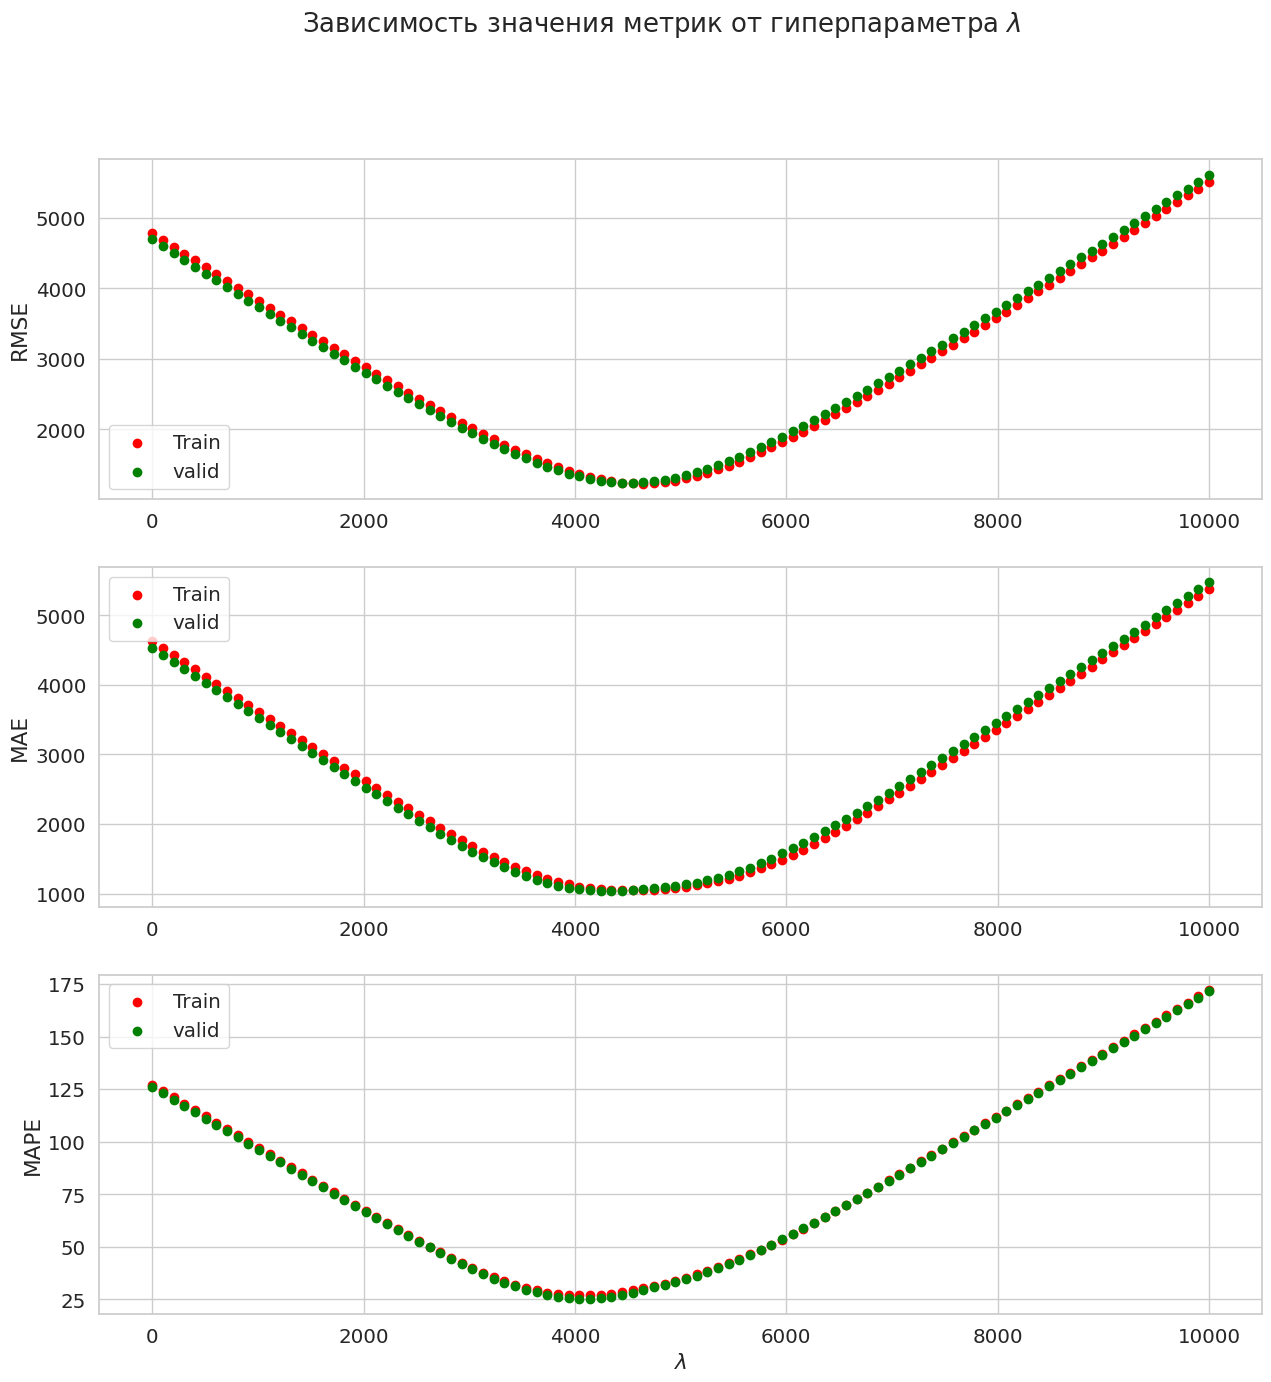

In [244]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

ax1.scatter(lambd, RMSE_t, c='red', label='Train')
ax1.scatter(lambd, RMSE_v, c='green', label='valid')
ax1.set_ylabel('RMSE')
ax1.legend()

ax2.scatter(lambd, MAE_t, c='red', label='Train')
ax2.scatter(lambd, MAE_v, c='green', label='valid')
ax2.set_ylabel('MAE')
ax2.legend()

ax3.scatter(lambd, MAPE_t, c='red', label='Train')
ax3.scatter(lambd, MAPE_v, c='green', label='valid')
ax3.set_ylabel('MAPE')
ax3.legend()

plt.suptitle(r"Зависимость значения метрик от гиперпараметра $\lambda$")
plt.xlabel(r'$\lambda$')

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

Text(0.5, 0, '$\\lambda$')

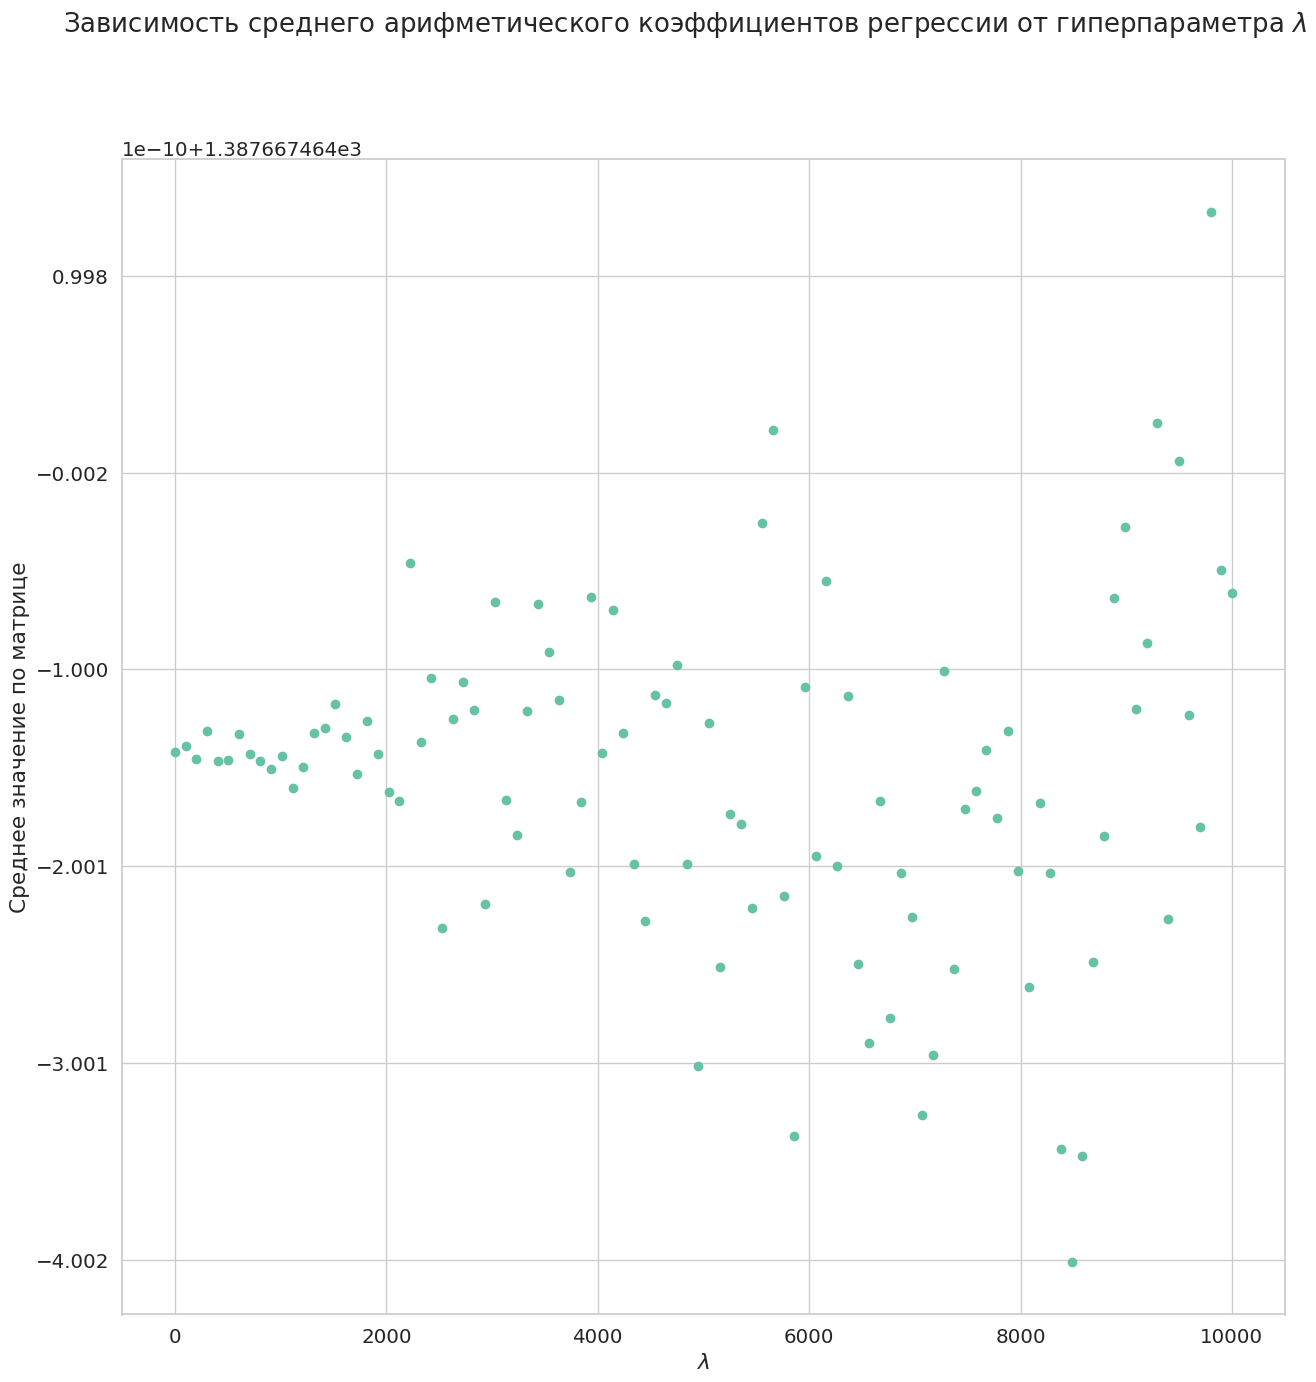

In [248]:
coefs_l = np.array(coefs_l)
coefs_mean = coefs_l.max(axis=(1, 2))
plt.scatter(lambd, coefs_mean)

plt.suptitle(r"Зависимость максимального коэффициента регрессии от гиперпараметра $\lambda$")
plt.ylabel('Среднее значение по матрице')
plt.xlabel(r'$\lambda$')

Из графика видно, что при увеличении $\lambda$ - растет максимальное значение коэффициентов в модели. Что странно. Несмотря на это все значения находятся сильно вблизи нуля, а это значит, что идея добавления нормы к функции потерь - действительно работает и не позволяет модели сходиться к каким-то большим весам коэффициентов.

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

In [249]:
lambda_0 = lambd[np.argmin(MAPE_v)]
lambda_0

4141.472727272727

In [250]:
model = RidgeRegression(lambd=lambda_0, fit_intercept=True)
model.fit(X_train, Y_train)

preds = model.predict(X_test)
RMSE_test, MAE_test, MAPE_test = calc_metrics(Y_test, preds)
print("Metrics on Test with lambda = {}: RMSE: {}, MAE: {}, MAPE: {}".format(lambda_0, RMSE_test, MAE_test, MAPE_test))

Metrics on Test with lambda = 4141.472727272727: RMSE: 1375.26482657297, MAE: 1131.0118873918414, MAPE: 100.34286413211247


Сделайте выводы.

### ВЫводы:

1) Первое, что стоит отметить, это преимущество работы ridgid-regression, для около вырожденных матриц $X^\intercal X$, а также не позволяет коэффициента убегать на бесконечность.
2) Также мы добились немного лучшего результата по сравнению с обычной регрессией.
3) Использованная $\lambda = 4141$
4) Но осталась та же проблема с огромным MAPE на тестовой выборке. Возможные причины которой я описывал выше.

Самое главное, что хочется отметить, это то, что изучая данные нужно очень внимательно искать выбросы. Ведь, насколько я понимаю, у меня получилась большая ошибка MAPE из-за потерянных выбросов на тестовой выборке.

### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

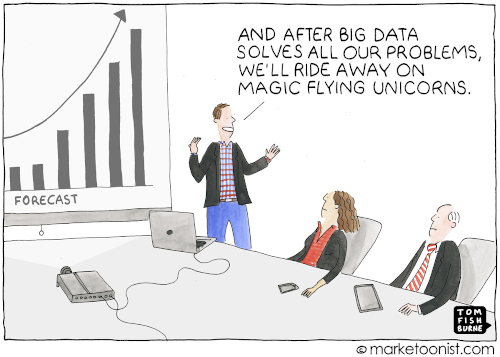

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [292]:
new_coef = old_coef = np.ones(X_train.shape[-1] + 1)

Реализуйте процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

In [0]:
def grad(coef, X, Y):
    X = np.hstack([X, np.ones((X.shape[0], 1))])

    # First part preinverted matrix
    coefs_1 = np.dot(X, coef)
    Y = np.array(Y).reshape(Y.shape[0])
    coefs_2 = np.dot(X.T, coefs_1 -Y)
    # Combine
    coefs_3 = coef * lambda_0
    return coefs_2 + coefs_3

In [313]:
def SGDpredict(X, coef):
    X = np.hstack([X, np.ones((X.shape[0], 1))])
    coef = coef.reshape((coef.shape[0], 1))
    return np.dot(X, coef)

In [319]:
RMSE_t, MAE_t, MAPE_t = [], [], []
RMSE_v, MAE_v, MAPE_v = [], [], []

new_coef = old_coef = np.ones(X_train.shape[-1] + 1)

size = X_train.shape[0]
indices = list(gen_batches(size, 256))
eta = 0.00001
eps = 0.1
diff = 100
iters, i = [], 0
while diff > eps:
    tmp_coef = old_coef
    for slice in indices:
        X_batch = X_train[slice]
        Y_batch = Y_train[slice]
        new_coef = tmp_coef - eta * size / len(X_batch) * grad(tmp_coef, X_batch, Y_batch)
        tmp_coef = new_coef
        print(old_coef.mean())
    diff = np.abs(new_coef - old_coef).mean()
    old_coef = new_coef
    print(diff)

    preds = SGDpredict(X_valid, new_coef)
    RMSE_lv, MAE_lv, MAPE_lv = calc_metrics(Y_valid, preds)

    RMSE_v.append(RMSE_lv)
    MAE_v.append(MAE_lv)
    MAPE_v.append(MAPE_lv)

    preds = SGDpredict(X_train, new_coef)
    RMSE_lt, MAE_lt, MAPE_lt = calc_metrics(Y_train, preds)

    RMSE_t.append(RMSE_lt)
    MAE_t.append(MAE_lt)
    MAPE_t.append(MAPE_lt)
    iters.append(i)
    i += 1


1.0
1.0
15.502505723848014
16.502505723848014
16.502505723848014
11.205144011307688
27.70764973515571
27.70764973515571
8.11979360971166
35.82744334486736
35.82744334486736
5.900898766253053
41.728342111120405
41.728342111120405
4.302081935680374
46.03042404680079
46.03042404680079
3.14756386994849
49.177987916749274
49.177987916749274
2.3118394016920543
51.48982731844133
51.48982731844133
1.7052207125245333
53.19504803096586
53.19504803096586
1.2655192656106626
54.458599363287156
54.458599363287156
0.9441572213336894
55.39948463565422
55.39948463565422
0.7081691333263372
56.103759228597625
56.103759228597625
0.534138843514476
56.63381579179932
56.63381579179932
0.40537699194398996
57.03502345308828
57.03502345308828
0.30981778256412706
57.34048022894174
57.34048022894174
0.23821084985938315
57.574419100969095
57.574419100969095
0.18425329600057536
57.75465266408289
57.75465266408289
0.14348084201706388
57.89433059645285
57.89433059645285
0.11238449512145787
58.003205464837286
58.00320

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

Text(0.5, 0, '$\\lambda$')

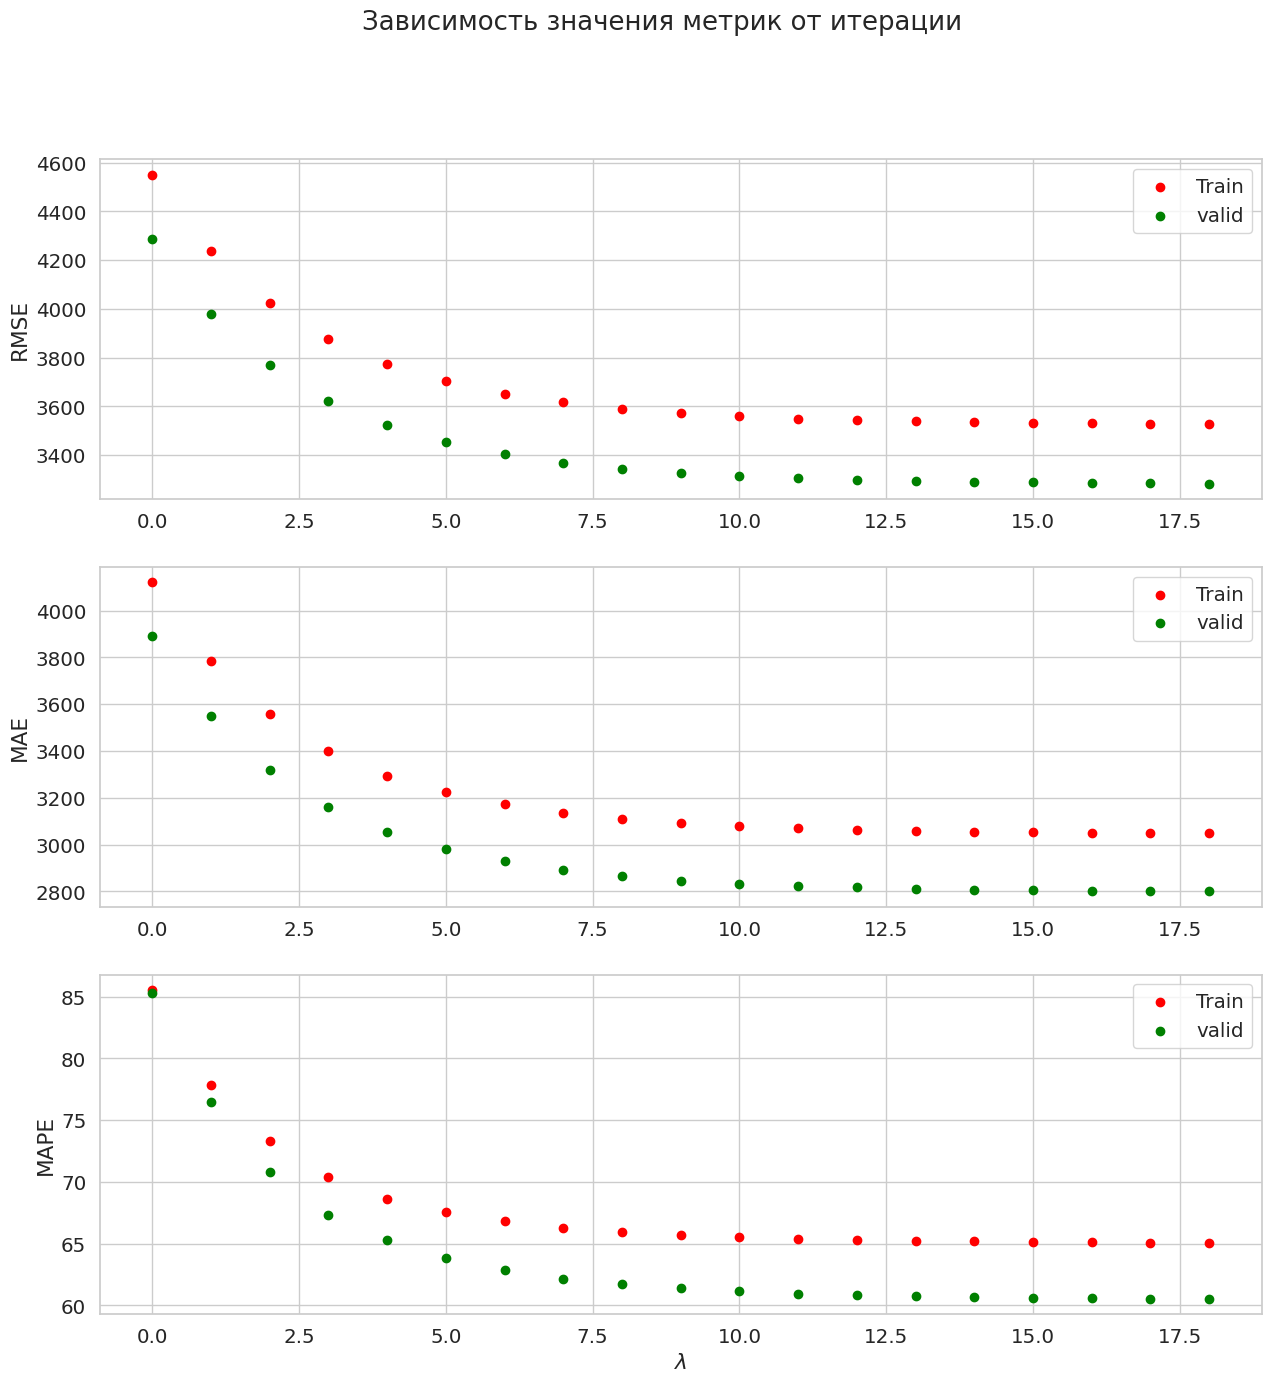

In [321]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
lambd = iters

ax1.scatter(lambd, RMSE_t, c='red', label='Train')
ax1.scatter(lambd, RMSE_v, c='green', label='valid')
ax1.set_ylabel('RMSE')
ax1.legend()

ax2.scatter(lambd, MAE_t, c='red', label='Train')
ax2.scatter(lambd, MAE_v, c='green', label='valid')
ax2.set_ylabel('MAE')
ax2.legend()

ax3.scatter(lambd, MAPE_t, c='red', label='Train')
ax3.scatter(lambd, MAPE_v, c='green', label='valid')
ax3.set_ylabel('MAPE')
ax3.legend()

plt.suptitle(r"Зависимость значения метрик от итерации")
plt.xlabel(r'Итерация')

Посчитайте ошибку на тестовой выборке.

In [322]:
preds = SGDpredict(X_test, new_coef)
RMSE_lt, MAE_lt, MAPE_lt = calc_metrics(Y_test, preds)
print('RMSE_lt: {}, MAE_lt: {}, MAPE_lt: {}'.format(RMSE_lt, MAE_lt, MAPE_lt))

RMSE_lt: 3298.135630654861, MAE_lt: 2712.7226962620953, MAPE_lt: 98.31137787660865


Сделайте выводы.

### Выводы

Из-за сложности ручного подбора гиперпараметров точность такой модели невысокая, о чем говорят метрики. Но в теории такой подход позволяет обрабатывать большие данные не обрабатывая большие матрицы.